In [1]:
import geojson
import geopandas as gpd
import contextily as ctx
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib as mpl
from matplotlib.colors import ListedColormap
from descartes import PolygonPatch

In [2]:
#Weekdays
dates = np.arange(0, 10001, 1).tolist()
ticks = np.arange(0, 24, 1).tolist()

df = pd.read_csv("peaks_it_v31_wd.csv", parse_dates=dates, infer_datetime_format=True) #use the adequate peak data

In [3]:
df.head()

Unnamed: 0                   0                   1                   2  \
0          0 2013-11-05 15:10:00 2013-11-05 15:10:00 2013-11-05 15:10:00   
1          1 2013-11-08 18:30:00 2013-11-08 18:30:00 2013-11-08 18:30:00   
2          2 2013-11-07 18:40:00 2013-11-07 18:40:00 2013-11-07 18:40:00   
3          3 2013-11-08 18:30:00 2013-11-08 18:30:00 2013-11-08 18:30:00   
4          4 2013-11-05 21:50:00 2013-11-05 21:50:00 2013-11-05 21:50:00   

                    3                   4                   5  \
0 2013-11-04 20:30:00 2013-11-05 15:10:00 2013-11-05 15:10:00   
1 2013-11-08 18:30:00 2013-11-08 18:30:00 2013-11-08 18:30:00   
2 2013-11-08 18:30:00 2013-11-08 18:30:00 2013-11-07 18:40:00   
3 2013-11-08 18:30:00 2013-11-08 18:30:00 2013-11-08 18:30:00   
4 2013-11-05 21:50:00 2013-11-05 21:50:00 2013-11-05 21:50:00   

                    6                   7                   8  ...  \
0 2013-11-05 15:10:00 2013-11-05 15:10:00 2013-11-05 15:10:00  ...   
1 2013-11-08 18:30:00 2013-11-08 18:30:00 2013-11-08 18:30:00  ...   
2 2013-11-07 18:40:00 2013-11-07 18:40:00 2013-11-07 18:40:00  ...   
3 2013-11-08 18:30:00 2013-11-08 18:30:00 2013-11-08 18:30:00  ...   
4 2013-11-05 21:50:00 2013-11-05 21:50:00 2013-11-05 21:50:00  ...   

                 9990                9991                9992  \
0 2013-11-05 18:10:00 2013-11-05 18:10:00 2013-11-07 19:20:00   
1 2013-11-08 21:30:00 2013-11-05 20:30:00 2013-11-06 21:10:00   
2 2013-11-06 18:40:00 2013-11-05 16:50:00 2013-11-04 17:40:00   
3 2013-11-06 18:40:00 2013-11-06 18:40:00 2013-11-07 17:20:00   
4 2013-11-04 20:00:00 2013-11-04 20:00:00 2013-11-06 15:30:00   

                 9993                9994                9995  \
0 2013-11-07 19:20:00 2013-11-05 18:30:00 2013-11-05 18:30:00   
1 2013-11-08 20:10:00 2013-11-04 18:40:00 2013-11-07 17:40:00   
2 2013-11-06 16:50:00 2013-11-06 16:40:00 2013-11-06 16:40:00   
3 2013-11-04 14:50:00 2013-11-08 17:30:00 2013-11-08 17:30:00   
4 2013-11-06 15:30:00 2013-11-08 18:00:00 2013-11-08 18:00:00   

                 9996                9997                9998  \
0 2013-11-04 19:00:00 2013-11-04 19:00:00 2013-11-04 18:40:00   
1 2013-11-05 18:30:00 2013-11-05 18:30:00 2013-11-05 21:20:00   
2 2013-11-04 18:20:00 2013-11-04 18:20:00 2013-11-06 16:40:00   
3 2013-11-08 17:00:00 2013-11-08 17:00:00 2013-11-08 17:50:00   
4 2013-11-08 20:50:00 2013-11-08 20:50:00 2013-11-08 18:00:00   

                 9999  
0 2013-11-08 18:40:00  
1 2013-11-05 18:10:00  
2 2013-11-06 17:50:00  
3 2013-11-06 14:20:00  
4 2013-11-04 15:10:00  

[5 rows x 10001 columns]

In [4]:
columns = list(df)
#smsin = [0]   callin = [2]
#smsout = [1]  callout = [3]
#internet = [4]
smsin=[]
for i in columns:
    if "Unnamed" in i:
        continue
    #print(df[i][0].minute/60)
    smsin.append(df[i][0].hour+df[i][0].minute/60)

In [5]:
gdf = gpd.read_file('./geojsons/milano-grid.geojson')
#gdf=gdf.to_crs('EPSG:3857')
#print(type(gdf))

with open("./geojsons/milano-grid.geojson") as json_file:
    json_data = geojson.load(json_file)

In [6]:
#Customize a Matplotlib cmap
jet = cm = plt.get_cmap('Greys')

newcolors = jet(np.linspace(0, 1, 256))

undef = np.array([256/256, 256/256, 256/256, 1])

#undefined: 0 - 5.30
home = np.array([91/256, 177/256, 242/256, 1])
newcolors[:63, :] = undef

#undefined: 5.30 - 7
newcolors[63:, :] = undef

#transport: 7 - 9
trans = np.array([91/256, 242/256, 146/256, 1])
newcolors[77:, :] = trans

#undefined: 9 - 10.30
newcolors[102:, :] = undef

#work: 10.30 - 12
work = np.array([226/256, 20/256, 61/256, 1])
newcolors[115:,:] = work

#undefined: 12 - 14
brek = np.array([240/256, 230/256, 132/256, 1])
newcolors[135:,:] = undef

#home: 14 - 22
work2 = np.array([239/256, 121/256, 148/256, 1])
newcolors[154:,:] = home

leis = np.array([157/256, 20/256, 226/256, 1])
newcolors[212:,:] = home

#undefined: 22 - 23
home2 = np.array([91/256, 177/256, 242/256, 1])
newcolors[246:,:] = undef

jet = ListedColormap(newcolors)

In [7]:

fig = plt.figure(dpi=240) 
ax = fig.gca()

cNorm  = colors.Normalize(vmin=0, vmax=23)
#print(np.max(smsin))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
#print(scalarMap.get_clim())
c=[]
for i in range(0,10000):
    poly = json_data.features[i]['geometry']
    colorVal = scalarMap.to_rgba(smsin[i])  
    json_data.features[i].properties = {
        "fill": colors.to_hex(colorVal, keep_alpha=True),
        "fill-opacity": 0.4,
        "stroke-width": 1,
        "stroke-opacity": 0.5,
        "cellId": i+1
    }
    ax.add_patch(PolygonPatch(poly, fc=colorVal, ec=colorVal, alpha=0.5, zorder=2 ))
    c.append(colorVal)

ax.axis('scaled')
ax.set_title("Peak hour according to incoming sms - weekdays")
#ax.set_axis_off()
fig.colorbar(scalarMap, ax=ax, ticks=ticks)

#plt.show()
ax.set_axis_off()
plt.close('all')

with open("./geojsons/milano-grid-smsin-weekday.geojson", "w") as json_file:
    geojson.dump(json_data, json_file)

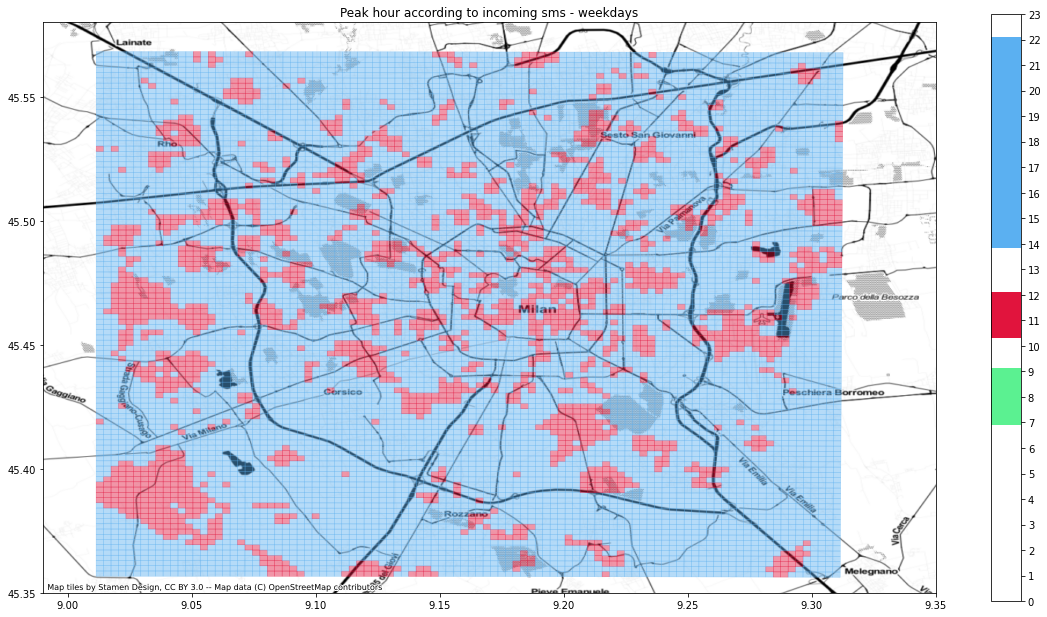

In [8]:
#json_data.features[0].properties = {
#        "stroke": "#555555",
#        "stroke-width": 2,
#        "stroke-opacity": 1,
#        "fill": "#6a6bcd",
#        "fill-opacity": 0.5,
#        "cellId": 1
#      }

ax=gdf.plot(figsize=(20,12), edgecolor=c,facecolor=c, linewidth=0.5, alpha=0.45)
ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.Stamen.Toner)# another good map to visualize: ctx.providers.CartoDB.Voyager
ax.axis('scaled')
ax.axis([8.99,9.35,45.35,45.58])
ax.set_aspect('equal')
ax.set_title("Peak hour according to incoming sms - weekdays")
fig.colorbar(scalarMap, ax=ax, shrink=0.9, ticks=ticks)
plt.show()

In [9]:
columns = list(df)

#smsin = [0]   callin = [2]
#smsout = [1]  callout = [3]
#internet = [4]
smsout=[]
for i in columns:
    if "Unnamed" in i:
        continue
    smsout.append(df[i][1].hour+df[i][1].minute/60)
    

In [10]:

fig = plt.figure(dpi=240) 
ax = fig.gca() 

cNorm  = colors.Normalize(vmin=0, vmax=23)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
#print(scalarMap.get_clim())
co=[]
for i in range(0,10000):
    poly = json_data.features[i]['geometry']
    colorVal = scalarMap.to_rgba(smsout[i]) #0-9999
    json_data.features[i].properties = {
        "fill": colors.to_hex(colorVal, keep_alpha=True),
        "fill-opacity": 0.4,
        "stroke-width":1,
        "stroke-opacity": 0.5,
        "cellId": i+1
    }
    ax.add_patch(PolygonPatch(poly, fc=colorVal, ec=colorVal, alpha=0.5, zorder=2 ))
    co.append(colorVal)
    
ax.axis('scaled')
ax.set_title("Peak hour according to outgoing sms - weekdays")
#ax.set_axis_off()
fig.colorbar(scalarMap, ax=ax)

#plt.show()
ax.set_axis_off()
plt.close('all')

with open("./geojsons/milano-grid-smsout-weekday.geojson", "w") as json_file:
    geojson.dump(json_data, json_file)

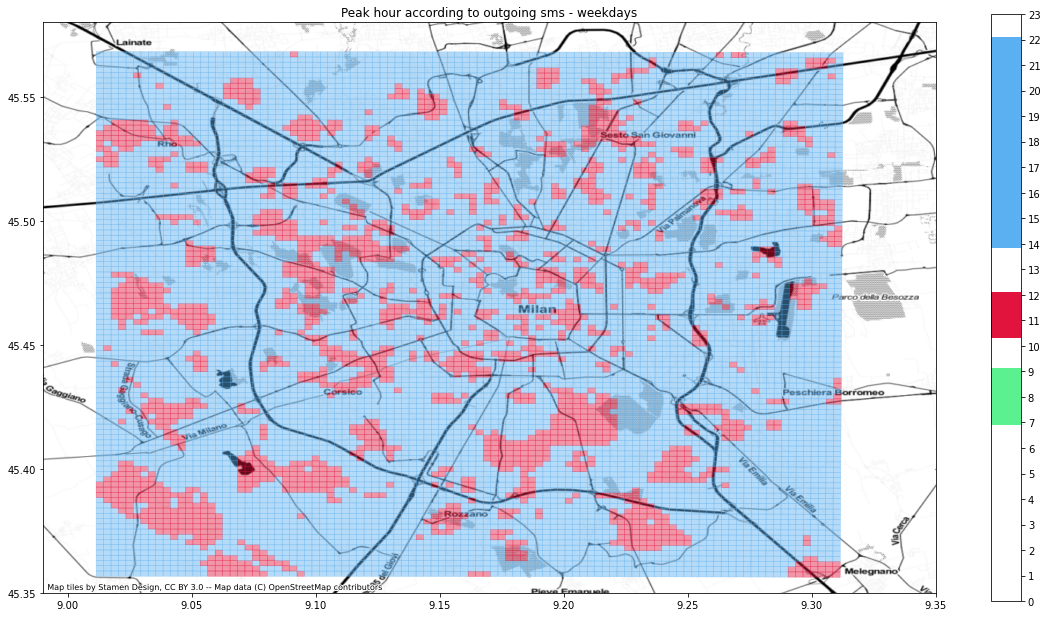

In [11]:
ax=gdf.plot(figsize=(20,12), edgecolor=co,facecolor=co, linewidth=0.5, alpha=0.45)
ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.Stamen.Toner)
ax.axis('scaled')
ax.axis([8.99,9.35,45.35,45.58])
ax.set_aspect('equal')
ax.set_title("Peak hour according to outgoing sms - weekdays")
fig.colorbar(scalarMap, ax=ax, shrink=0.9, ticks=ticks)
plt.show()

In [12]:
columns = list(df)

#smsin = [0]   callin = [2]
#smsout = [1]  callout = [3]
#internet = [4]
callin=[]
for i in columns:
    if "Unnamed" in i:
        continue
    callin.append(df[i][2].hour+df[i][2].minute/60)
#print(df["428"][2])

2013-11-06 17:30:00


In [13]:

fig = plt.figure(dpi=240) 
ax = fig.gca() 

cNorm  = colors.Normalize(vmin=0, vmax=23)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
#print(scalarMap.get_clim())
cc=[]
for i in range(0,10000):
    poly = json_data.features[i]['geometry']
    colorVal = scalarMap.to_rgba(callin[i]) #0-9999
    json_data.features[i].properties = {
        "fill": colors.to_hex(colorVal, keep_alpha=True),
        "fill-opacity": 0.4,
        "stroke-width":1,
        "stroke-opacity": 0.5,
        "cellId": i+1
    }
    ax.add_patch(PolygonPatch(poly, fc=colorVal, ec=colorVal, alpha=0.5, zorder=2 ))
    cc.append(colorVal)
    
ax.axis('scaled')
ax.set_title("Peak hour according to incoming calls - weekdays")
#ax.set_axis_off()
fig.colorbar(scalarMap, ax=ax)

#plt.show()
ax.set_axis_off()
plt.close('all')
with open("./geojsons/milano-grid-callin-weekday.geojson", "w") as json_file:
    geojson.dump(json_data, json_file)

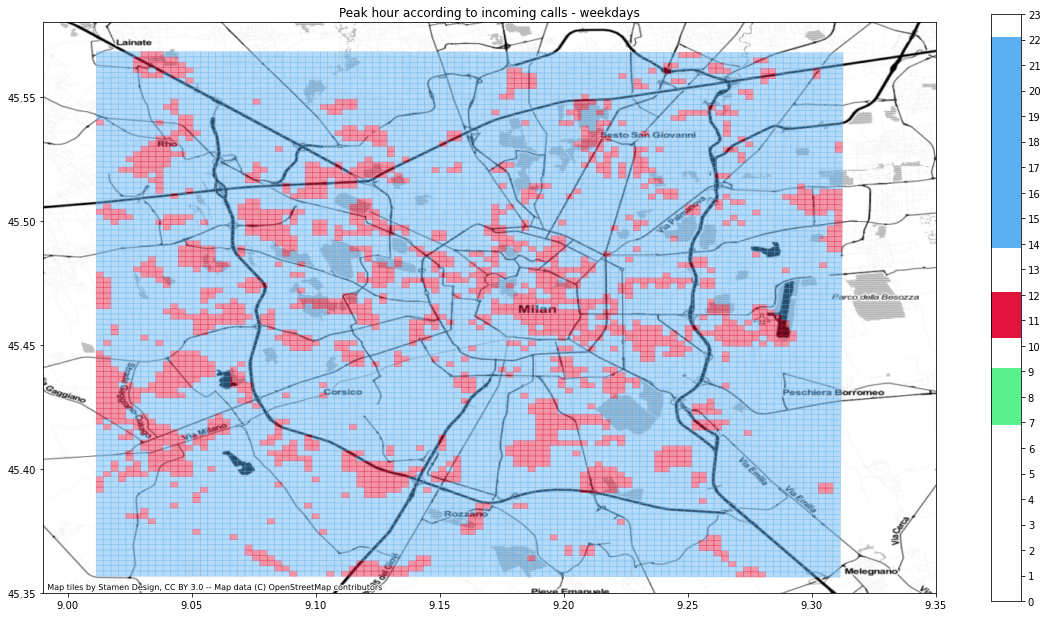

In [14]:
ax=gdf.plot(figsize=(20,12), edgecolor=cc,facecolor=cc, linewidth=0.5, alpha=0.45)
ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.Stamen.Toner)
ax.axis('scaled')
ax.axis([8.99,9.35,45.35,45.58])
ax.set_aspect('equal')
ax.set_title("Peak hour according to incoming calls - weekdays")
fig.colorbar(scalarMap, ax=ax, shrink=0.9, ticks=ticks)
plt.show()

In [15]:
columns = list(df)

#smsin = [0]   callin = [2]
#smsout = [1]  callout = [3]
#internet = [4]
callout=[]
for i in columns:
    if "Unnamed" in i:
        continue
    callout.append(df[i][3].hour+df[i][3].minute/60)


In [16]:

fig = plt.figure(dpi=240) 
ax = fig.gca() 

cNorm  = colors.Normalize(vmin=0, vmax=23)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
cco=[]

for i in range(0,10000):
    poly = json_data.features[i]['geometry']
    colorVal = scalarMap.to_rgba(callout[i]) #0-9999
    json_data.features[i].properties = {
        "fill": colors.to_hex(colorVal, keep_alpha=True),
        "fill-opacity": 0.4,
        "stroke-width":1,
        "stroke-opacity": 0.5,
        "cellId": i+1
    }
    ax.add_patch(PolygonPatch(poly, fc=colorVal, ec=colorVal, alpha=0.5, zorder=2 ))
    cco.append(colorVal)
    
ax.axis('scaled')
ax.set_title("Peak hour according to outgoing calls - weekdays")
#ax.set_axis_off()
fig.colorbar(scalarMap, ax=ax)

#plt.show()
ax.set_axis_off()
plt.close('all')
with open("./geojsons/milano-grid-callout-weekday.geojson", "w") as json_file:
    geojson.dump(json_data, json_file)

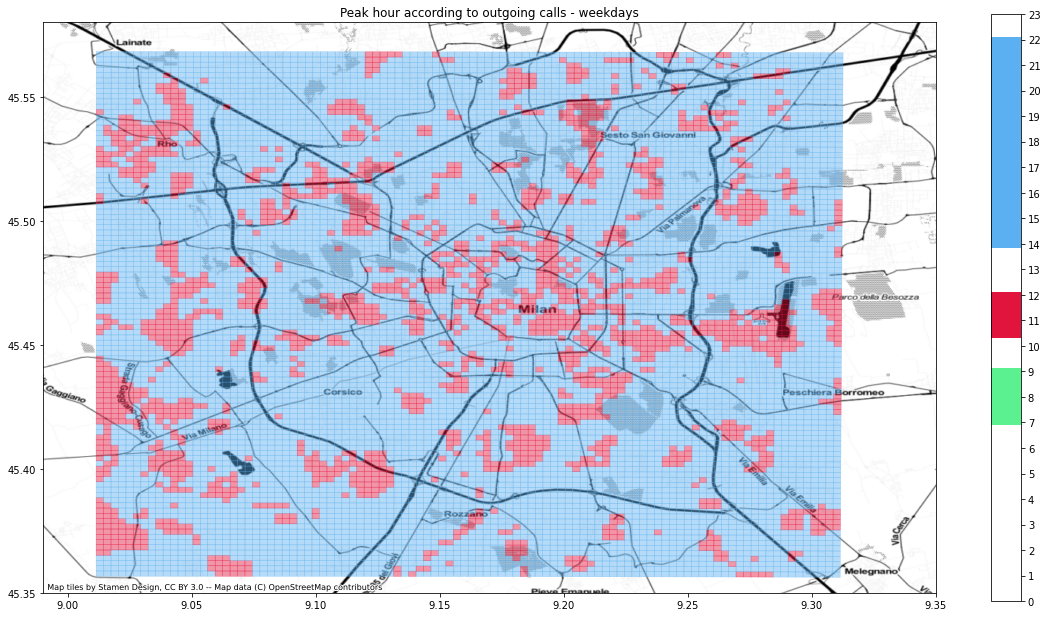

In [17]:
ax=gdf.plot(figsize=(20,12), edgecolor=cco,facecolor=cco, linewidth=0.5, alpha=0.45)
ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.Stamen.Toner)
ax.axis('scaled')
ax.axis([8.99,9.35,45.35,45.58])
ax.set_aspect('equal')
ax.set_title("Peak hour according to outgoing calls - weekdays")
fig.colorbar(scalarMap, ax=ax, shrink=0.9, ticks=ticks)
plt.show()

In [18]:
columns = list(df)

#smsin = [0]   callin = [2]
#smsout = [1]  callout = [3]
#internet = [4]
internet=[]
for i in columns:
    if "Unnamed" in i:
        continue
    internet.append(df[i][4].hour+df[i][4].minute/60)


In [19]:

fig = plt.figure(dpi=240) 
ax = fig.gca() 

cNorm  = colors.Normalize(vmin=0, vmax=23)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
#print(scalarMap.get_clim())
it=[]
for i in range(0,10000):
    poly = json_data.features[i]['geometry']
    colorVal = scalarMap.to_rgba(internet[i]) #0-9999
    json_data.features[i].properties = {
        "fill": colors.to_hex(colorVal, keep_alpha=True),
        "fill-opacity": 0.4,
        "stroke-width":1,
        "stroke-opacity": 0.5,
        "cellId": i+1
    }
    ax.add_patch(PolygonPatch(poly, fc=colorVal, ec=colorVal, alpha=0.5, zorder=2 ))
    it.append(colorVal)
    
ax.axis('scaled')
ax.set_title("Peak hour according to internet traffic - weekdays")
#ax.set_axis_off()
fig.colorbar(scalarMap, ax=ax, ticks=ticks)

#plt.show()
ax.set_axis_off()
plt.close('all')
with open("./geojsons/milano-grid-intnt-weekday.geojson", "w") as json_file:
    geojson.dump(json_data, json_file)

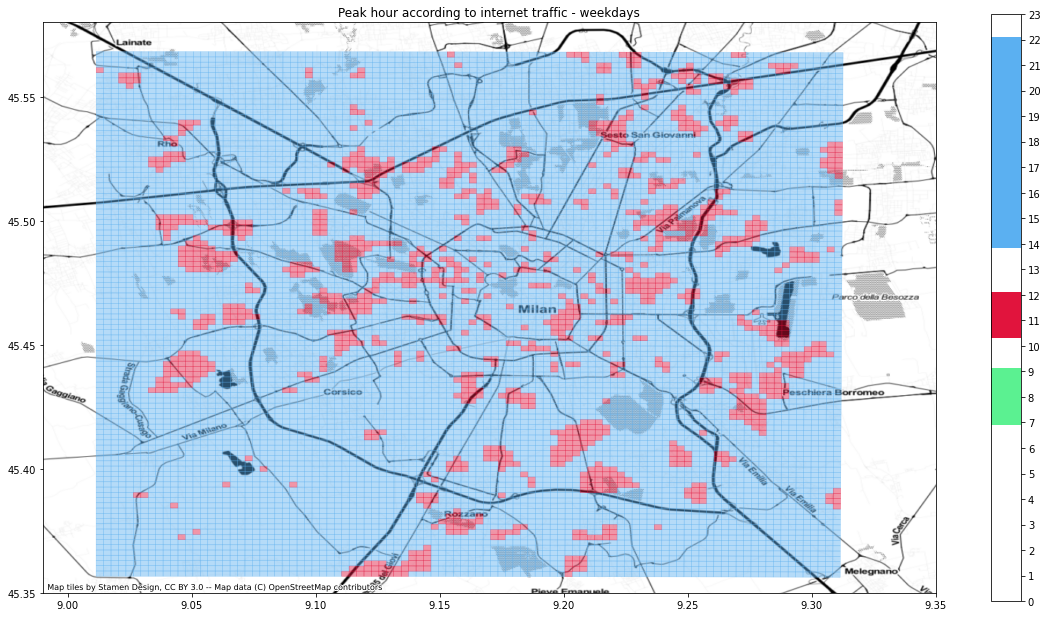

In [20]:
ax=gdf.plot(figsize=(20,12), edgecolor=it,facecolor=it, linewidth=0.5, alpha=0.45)
ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.Stamen.Toner)
ax.axis('scaled')
ax.axis([8.99,9.35,45.35,45.58])
ax.set_aspect('equal')
ax.set_title("Peak hour according to internet traffic - weekdays")
fig.colorbar(scalarMap, ax=ax, shrink=0.9, ticks=ticks)
plt.show()